### CSE-221710304057-T.Snithika Patel

Problem Statement: Segment the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc.

Make the Segmentation based on Hierarchical Clustering and K-Means Clustering


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/Wholesale%20customers%20data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.shape

(440, 8)

In [4]:
df.nunique()

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
from sklearn.preprocessing import scale
no_df=scale(df.iloc[:,1:])
no_df

array([[ 0.59066829,  0.05293319,  0.52356777, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 0.59066829, -0.39130197,  0.54445767, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 0.59066829, -0.44702926,  0.40853771, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 0.59066829,  0.20032554,  1.31467078, ..., -0.54337975,
         2.51121768,  0.12145607],
       [ 0.59066829, -0.13538389, -0.51753572, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [ 0.59066829, -0.72930698, -0.5559243 , ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [8]:
from scipy.cluster.hierarchy import linkage
a=linkage(no_df,method="complete",metric="euclidean")

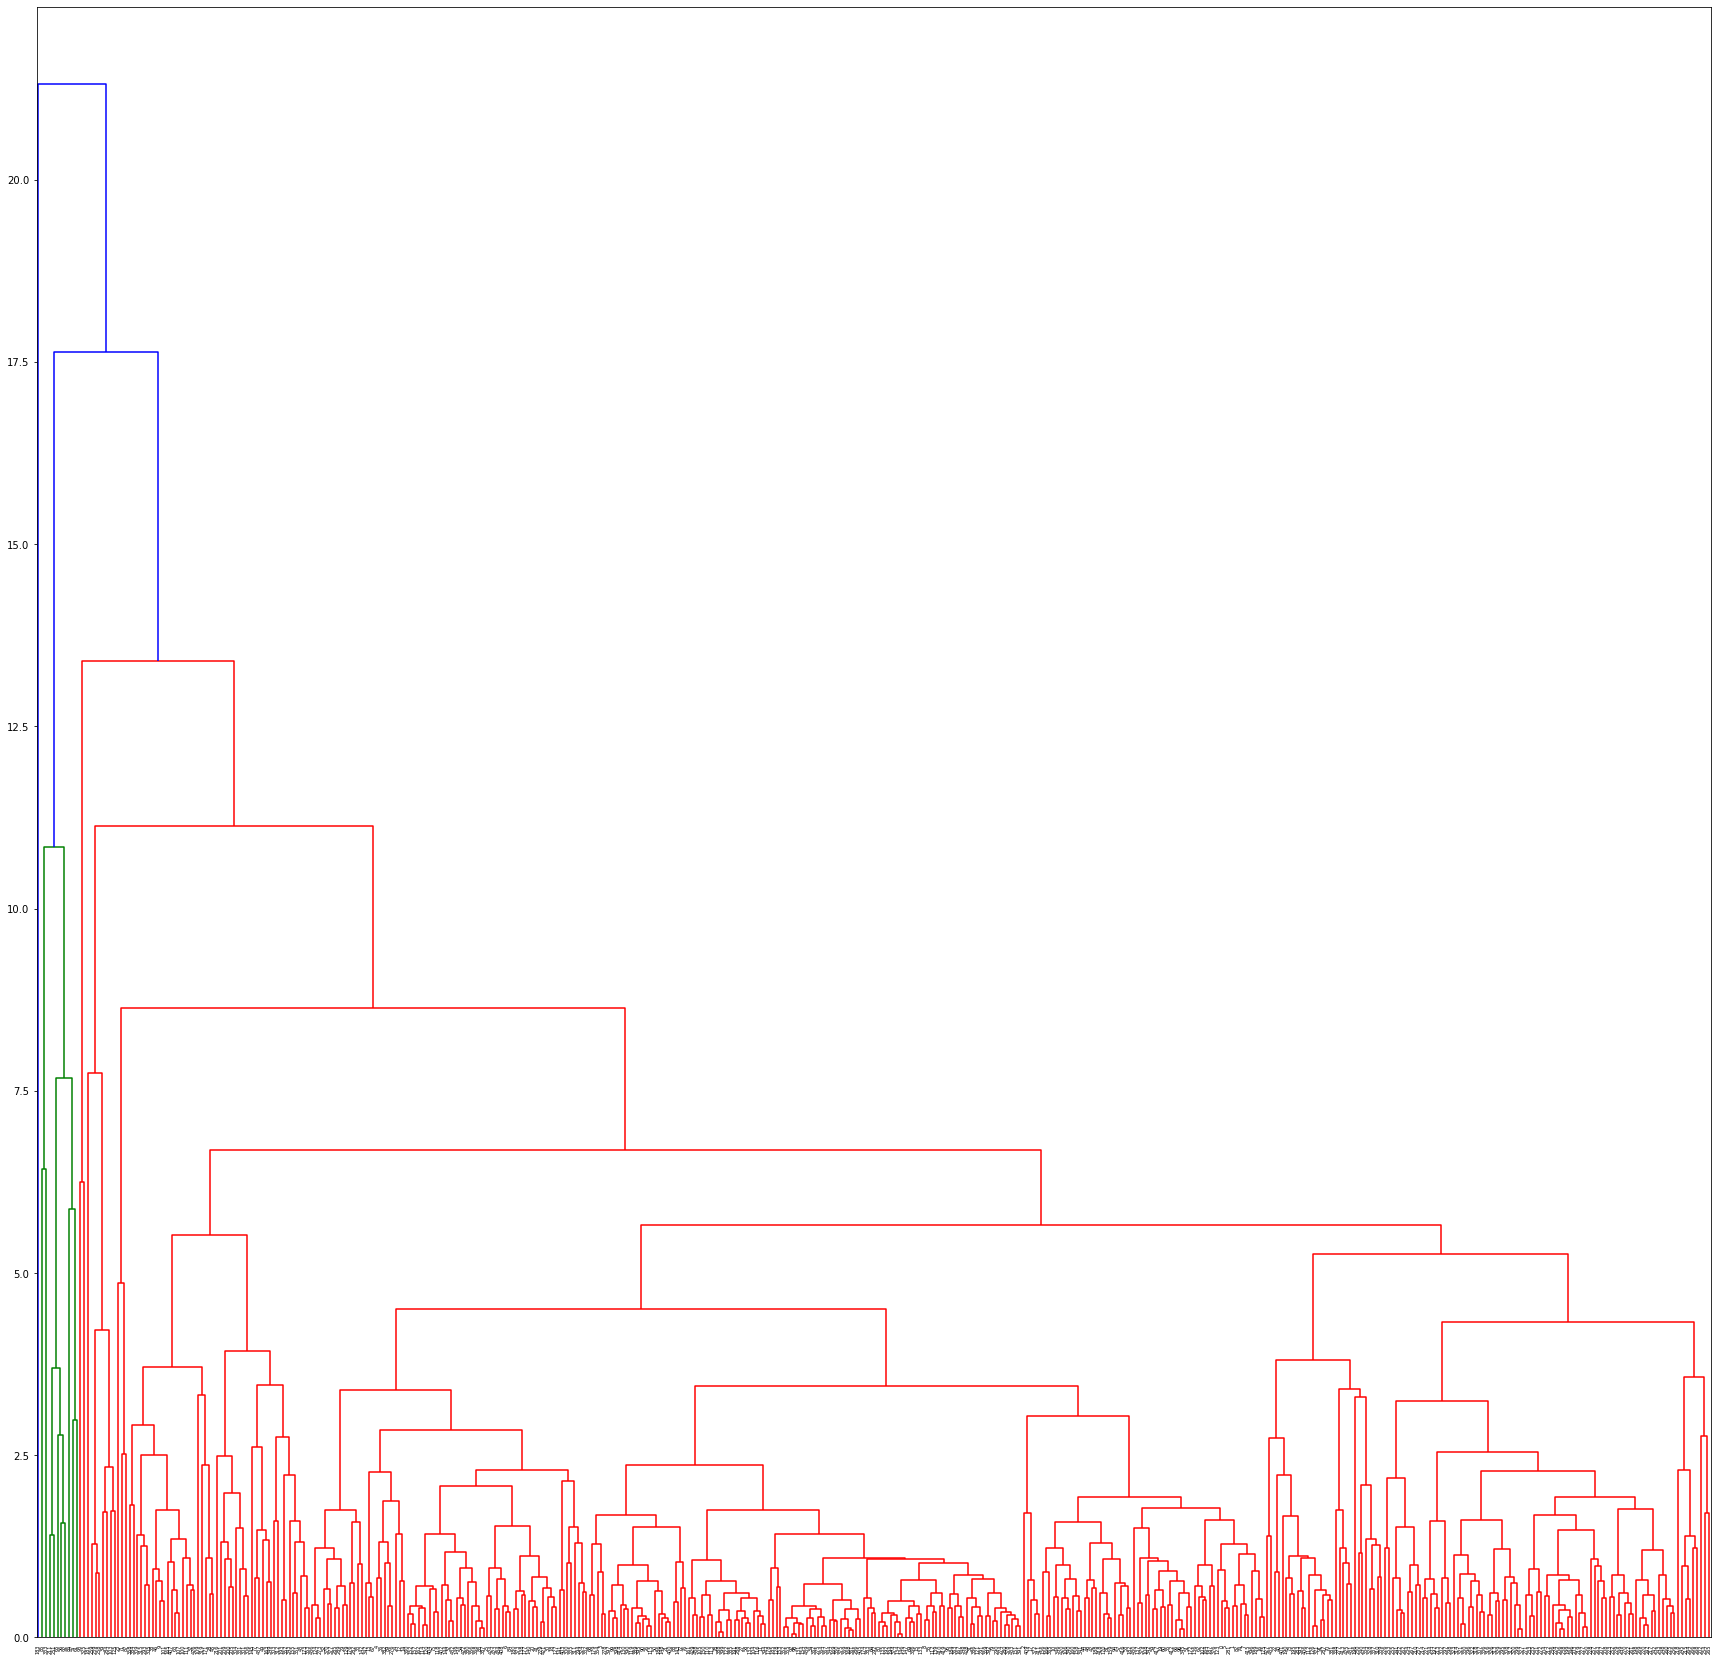

In [9]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(30,30))
sch.dendrogram(a)
plt.show()

In [10]:
from sklearn.cluster import AgglomerativeClustering
clus = AgglomerativeClustering(n_clusters = 5, linkage='complete',affinity='euclidean').fit(no_df)

In [11]:
clus.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [12]:
cluster=pd.DataFrame(clus.labels_)
cluster

,0
0,2
1,2
2,2
3,2
4,2
5,2
6,2
7,2
8,2
9,2


In [13]:
df['cluster']=cluster
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,2


In [14]:
df1 = df.iloc[:, [8, 0,1,2,3,4,5,6,7]]
df1

,cluster,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,2,3,12669,9656,7561,214,2674,1338
1,2,2,3,7057,9810,9568,1762,3293,1776
2,2,2,3,6353,8808,7684,2405,3516,7844
3,2,1,3,13265,1196,4221,6404,507,1788
4,2,2,3,22615,5410,7198,3915,1777,5185
5,2,2,3,9413,8259,5126,666,1795,1451
6,2,2,3,12126,3199,6975,480,3140,545
7,2,2,3,7579,4956,9426,1669,3321,2566
8,2,1,3,5963,3648,6192,425,1716,750
9,2,2,3,6006,11093,18881,1159,7425,2098


In [15]:
df1.iloc[:,3:].groupby(df1.cluster).mean()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,15964.900000,34708.500000,48536.900000,3054.600000,24875.200000,2942.800000
1,65795.125000,6707.375000,7613.250000,10585.250000,1336.750000,2960.000000
2,10771.463007,4978.016706,6960.451074,2634.868735,2402.933174,1340.298329
3,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000
4,22015.500000,9937.000000,7844.000000,47939.000000,671.500000,4153.500000


**K-Means Non-Heirarachial Clustering**

In [16]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, init= 'k-means++', random_state=0)
    kmeans.fit(no_df)
    wcss.append(kmeans.inertia_)

wcss

[3080.000000000003,
 2392.881865963342,
 2025.2725309320028,
 1708.3698988515744,
 1437.708056620999]

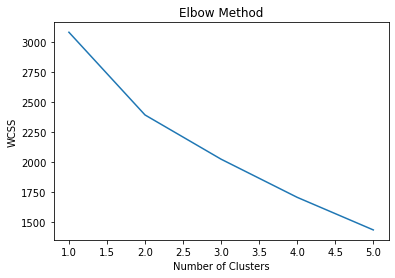

In [17]:
plt.plot(range(1,6), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Here k=2 is the best for Clustering